# Single Family Properties

## Goal:
    * Discover drivers of property values
    * Use drivers to develop a machine learning model to classify home owners and predict the value of their homes

# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy.stats import norm
import statistics
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
import wrangle as w
from scipy import stats

np.random.seed(123)

# Aquire
    * Data aquired from Zillow SQL database
    * It contained 2985217 rows and 59 columns before cleaning
    * Each row represents a home owner
    * Each column represents a feature of the property

# Prepare
##### Prepare Actions:
    * Removed columns that did not contain useful information
    * Rename columns to promote readability
    * Checked for null in the data
    * Checked that colmn data types were appropriate
    * Removed white space from values in object columns
    * Encoded categorical variables
    * Split data into train, validate, and test
    * Scaled continous variables
    * Outliers have been removed from this iteration  of the project

# Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|bedrooms|  Number of bedrooms in home |
|bathrooms|  Number of bathrooms in home including fractional bathrooms |
|fips|  Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details |
|taxamount|  The total property tax assessed for that assessment year |
|year_built|  The Year the principal residence was built |
|square_feet|Calculated total finished living area of the home |
|property_value|  The total tax assessed value of the parcel |

In [2]:
# aquiring data and looking at the data
df = w.wrangle_zillow()
df.head()

bedrooms  bathrooms  square_feet  property_value  yearbuilt  taxamount  \
4          4          2         3633          296425       2005       6941   
6          3          4         1620          847770       2011      10244   
7          3          2         2077          646760       1926       7924   
11         0          0         1200            5328       1972         91   
14         0          0          171            6920       1973        255   

    fips     baseline  
4   6037  1862.231792  
6   6037  1862.231792  
7   6037  1862.231792  
11  6037  1862.231792  
14  6037  1862.231792

In [3]:
# splitting data into train, validate, and test
train, validate, test = w.split_zillow(df)

### A brief look at the data

In [4]:
train.head()

bedrooms  bathrooms  square_feet  property_value  yearbuilt  \
753133          3          3         2609          616885       2001   
38951           4          5         5030         1573637       1997   
1250207         3          1         1015           45510       1944   
1994915         2          2         1347          228525       1947   
1718067         4          4         3177         1238624       1960   

         taxamount  fips     baseline  
753133        6696  6111  1862.231792  
38951        17709  6037  1862.231792  
1250207        598  6037  1862.231792  
1994915       2813  6037  1862.231792  
1718067      13996  6037  1862.231792

### A summery of the data

In [5]:
train.describe()

bedrooms     bathrooms   square_feet  property_value     yearbuilt  \
count  1.198509e+06  1.198509e+06  1.198509e+06    1.198509e+06  1.198509e+06   
mean   3.301475e+00  2.186956e+00  1.862337e+03    4.596988e+05  1.960970e+03   
std    9.314530e-01  9.720801e-01  9.660099e+02    6.442067e+05  2.215232e+01   
min    0.000000e+00  0.000000e+00  1.000000e+00    2.200000e+01  1.801000e+03   
25%    3.000000e+00  2.000000e+00  1.258000e+03    1.892700e+05  1.949000e+03   
50%    3.000000e+00  2.000000e+00  1.624000e+03    3.286280e+05  1.958000e+03   
75%    4.000000e+00  3.000000e+00  2.208000e+03    5.346410e+05  1.976000e+03   
max    1.500000e+01  3.200000e+01  6.369200e+04    3.604138e+07  2.016000e+03   

          taxamount          fips      baseline  
count  1.198509e+06  1.198509e+06  1.198509e+06  
mean   5.605335e+03  6.048324e+03  1.862232e+03  
std    7.405107e+03  2.036291e+01  7.072006e-09  
min    1.300000e+01  6.037000e+03  1.862232e+03  
25%    2.541000e+03  6.037000e+03  1.862232e+03  
50%    4.114000e+03  6.037000e+03  1.862232e+03  
75%    6.412000e+03  6.059000e+03  1.862232e+03  
max    3.923850e+05  6.111000e+03  1.862232e+03

# Explore

## Does the fip determine property value?

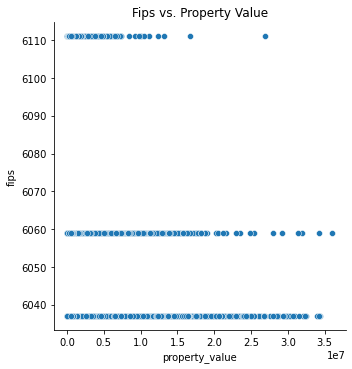

In [6]:
#property at 6035 is more likely to have a higher property value
w.get_fips(train)

##### The lower the fips the greater the property value

##### I will now use a chi-square test to investigate whether 'fips' and 'property_value' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'fips' and 'property_value' are independent of one another
#### Ha: 'fips' and 'property_value' are related

In [7]:
w.get_chi_fips(train)

chi^2 = 1539281.9230
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'fips' and 'property value' are related. Based on this I believe that using the 'fips' feature in modeling will likely have a positive impact on the model's accuracy.

## Does Square Feet determine Property Value?

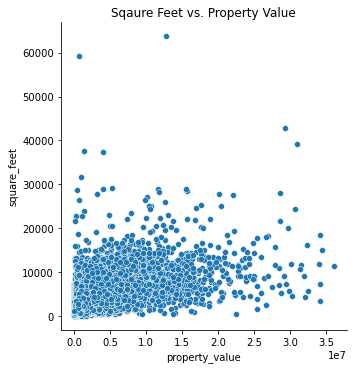

In [8]:
# the higher the square feet the higher the property value
w.get_square_feet(train)

##### There does not appear to be a correlation between square feet and property value

## Does Year Built determine Property Value?

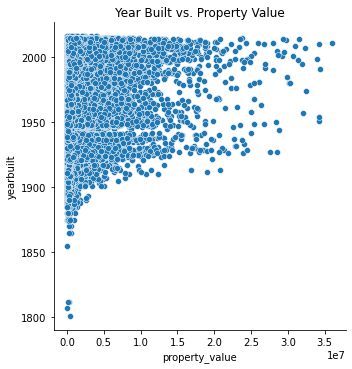

In [4]:
# the newer the house the higher the property value
w.get_year_built(train)

##### The earlier a house is built the more it is worth

##### I will now use a chi-square test to investigate whether 'year built' and 'property value' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'year built' and 'property value' are independent of one another
#### Ha: 'year built' and 'property value' are related

In [27]:
w.get_chi_year_built(train)

chi^2 = 69980603.1074
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'yearbuilt' and 'property value' are related. Based on this I believe that using the 'yearbuilt' feature in modeling will likely have a positive impact on the model's accuracy.

## Does number of basthrooms determine property value?

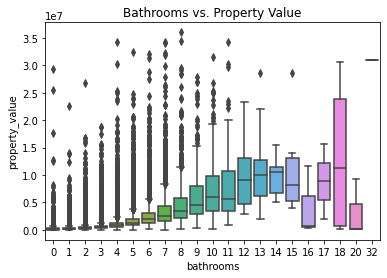

In [5]:
# the more bathrooms the higher the property value
w.get_bathrooms(train)

##### The more bathrooms a house has the more it is worth

##### I will now use a chi-square test to investigate whether 'bathrooms' and 'property value' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'bathrooms' and 'property value' are independent of one another
#### Ha: 'bathrooms' and 'property value' are related

In [29]:
w.get_chi_bathrooms(train)

chi^2 = 19846220.9265
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'bathrooms' and 'property value' are related. Based on this I believe that using the 'bathrooms' feature in modeling will likely have a positive impact on the model's accuracy.

## Does number of bedrooms determine property value?

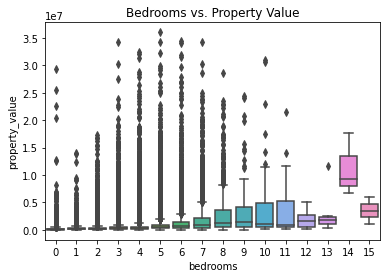

In [6]:
# the more bedrooms the higher the property value
w.get_bedrooms(train)

##### The more bedrooms a house has the more it is worth

# Exploration Summery
    *
    *
    *
    *
    *

# Features I am moving to modeling with
    *
    *
    *
    *

# Features I am not moving to modeling with
    * "square_feet"(There is no evidence that square_feet is a driver of churn)

# Modeling
    * Models will be evaluated on train and validate data
    * The model that performs the best will then be evaluated on test data

# Linear Regression

# LassoLars

# TweedieRegressor

# Polynomial Regression

# Comparing Models

# [Blank] on Test

## Modeling Summary

# Conclusions

## Exploration

## Modeling 

## Recommendations 

## Next Steps